In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Reading in the 1/4 degree data and performing energy decomposition

In [31]:
#1/4 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00031502.nc', decode_times=False)  #100 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/scratch/gmarques/NW2_TMP/nw2_0.25deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [32]:
%%time
xh_025 = fs.xh.values
yh_025 = fs.yh.values
# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'];  u = grid.interp(u,axis='X')
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')



done part 1
done part 2
CPU times: user 9.33 s, sys: 8.58 s, total: 17.9 s
Wall time: 43.2 s


In [33]:
%%time
# The mean BT and BC KE values:
u_TW=u*h/Depth; 
u_BT=u_TW.sum('zl')
u_BC=u-u_BT;

v_TW=v*h/Depth
v_BT=v_TW.sum('zl')
v_BC=v-v_BT;

KE_BT=0.5*(v_BT**2+u_BT**2) #dim y,x
KE_BC=(0.5*(v_BC**2+u_BC**2)*h/Depth).sum('zl') #dim y,x

print('done part 1')

# #Total kinetic energy:
KE_tot=KE_BT+KE_BC
KE_error = (0.5*(u**2+v**2)*h/Depth).sum('zl')-KE_tot

fraction_BT=KE_BT/KE_tot
fraction_BC=KE_BC/KE_tot #when you divide zero/zero it's a nan

KE_BT_025=KE_BT.mean('time')
KE_BC_025=KE_BC.mean('time')
fraction_BT_025=fraction_BT.mean('time')
fraction_BC_025=fraction_BC.mean('time')
print('done')

done part 1
done
CPU times: user 5 s, sys: 11.2 s, total: 16.2 s
Wall time: 16.2 s


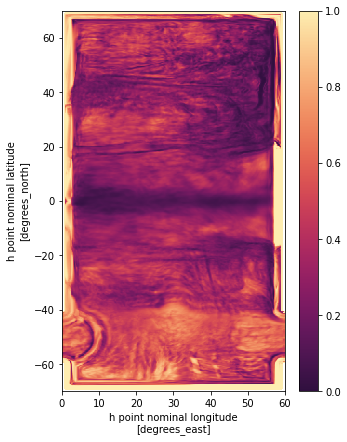

In [36]:
fraction_BT_025.plot(figsize=(5, 7),cmap=cmocean.cm.matter_r,vmin=0,vmax=1)

## Reading in the 1/8 degree data and performing energy decomposition

In [5]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00004502.nc', decode_times=False)  #100 5-day averages
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/


/glade/scratch/gmarques/NW2_TMP/nw2_0.125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [6]:
%%time
xh_0125 = fs.xh.values
yh_0125 = fs.yh.values
# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'];  u = grid.interp(u,axis='X')
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')



done part 1
done part 2
CPU times: user 40.1 s, sys: 24.9 s, total: 1min 5s
Wall time: 1min 56s


In [7]:
%%time
# The mean BT and BC KE values:
u_TW=u*h/Depth; 
u_BT=u_TW.sum('zl')
u_BC=u-u_BT;

v_TW=v*h/Depth
v_BT=v_TW.sum('zl')
v_BC=v-v_BT;

KE_BT=0.5*(v_BT**2+u_BT**2) #dim y,x
KE_BC=(0.5*(v_BC**2+u_BC**2)*h/Depth).sum('zl') #dim y,x

print('done part 1')

# #Total kinetic energy:
KE_tot=KE_BT+KE_BC
KE_error = (0.5*(u**2+v**2)*h/Depth).sum('zl')-KE_tot

fraction_BT=KE_BT/KE_tot
fraction_BC=KE_BC/KE_tot #when you divide zero/zero it's a nan

KE_BT_0125=KE_BT.mean('time')
KE_BC_0125=KE_BC.mean('time')
fraction_BT_0125=fraction_BT.mean('time')
fraction_BC_0125=fraction_BC.mean('time')
print('done')

done part 1
done
CPU times: user 19.5 s, sys: 33 s, total: 52.5 s
Wall time: 52.5 s


## Reading in the 1/16 degree data and performing energy decomposition

In [9]:
#1/16 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00004502.nc', decode_times=False)  #100 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/


/glade/scratch/gmarques/NW2_TMP/nw2_0.0625deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [10]:
%%time
#COMPUTE KE AND THEN WEIGH BY THICKNESS
xh_00625 = fs.xh.values
yh_00625 = fs.yh.values

# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'].mean('time').fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 100 5-day averages.
u  = av['u'];  u = grid.interp(u,axis='X')
print('done part 2')
v  = av['v'];  v = grid.interp(v,axis='Y')


done part 1
done part 2
CPU times: user 2min 46s, sys: 1min 42s, total: 4min 29s
Wall time: 5min 27s


In [11]:
%%time
# The mean BT and BC KE values:
u_TW=u*h/Depth; 
u_BT=u_TW.sum('zl')
u_BC=u-u_BT;

v_TW=v*h/Depth
v_BT=v_TW.sum('zl')
v_BC=v-v_BT;

KE_BT=0.5*(v_BT**2+u_BT**2) #dim y,x
KE_BC=(0.5*(v_BC**2+u_BC**2)*h/Depth).sum('zl') #dim y,x

print('done part 1')

# #Total kinetic energy:
KE_tot=KE_BT+KE_BC
KE_error = (0.5*(u**2+v**2)*h/Depth).sum('zl')-KE_tot

fraction_BT=KE_BT/KE_tot
fraction_BC=KE_BC/KE_tot #when you divide zero/zero it's a nan

KE_BT_00625=KE_BT.mean('time')
KE_BC_00625=KE_BC.mean('time')
fraction_BT_00625=fraction_BT.mean('time')
fraction_BC_00625=fraction_BC.mean('time')
print('done')

done part 1
done
CPU times: user 1min 29s, sys: 2min 33s, total: 4min 3s
Wall time: 4min 3s


## Reading in the 1/32 degree data and performing energy decomposition

In [14]:
#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
%ls
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_dataset('sub01/ocean.stats.nc', decode_times=False)
#os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
#                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00002702.nc', decode_times=False)  #20 5-day averages
#av = xr.open_mfdataset(['averages_00000502.nc','averages_00000602.nc','averages_00000702.nc','averages_00000802.nc','averages_00000902.nc'], decode_times=False)  #20 5-day averages

%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/scratch/gmarques/NW2_TMP/nw2_0.03125deg_N15_baseline_hmix5
available_diags.000000  longmean_00002050.nc         snapshots_00002705.nc
averages_00002002.nc    longmean_00002150.nc         static.nc
averages_00002102.nc    longmean_00002250.nc         sub01/
averages_00002202.nc    longmean_00002350.nc         sub02/
averages_00002302.nc    longmean_00002450.nc         sub03/
averages_00002402.nc    longmean_00002550.nc         sub04/
averages_00002502.nc    longmean_00002650.nc         sub04_sfc/
averages_00002602.nc    longmean_00002750.nc         sub05/
averages_00002702.nc    MOM_IC_1.nc                  sub05_sfc/
CPU_stats               MOM_IC_2.nc                  sub06/
diag_table@             MOM_IC.nc                    sub06_sfc/
diag_table.final        MOM_input@                   sub07/
diag_table.init         MOM_layout@                  sub07_sfc/
diag_table.sfc          MOM_override                 sub08/
exitcode                MOM_parameter_doc.all        sub08_s

In [15]:
%%time
#COMPUTE KE AND THEN WEIGH BY THICKNESS
xh_003125 = fs.xh.values
yh_003125 = fs.yh.values

# #COMPUTE velocity components for decomposing KE:
Nlayers=15

grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});
h  = av['h'][:,:].mean('time')#.compute().fillna(0.)
Depth=h.sum('zl')
print('done part 1')
#Outputs are comprised of 20 5-day averages.
u  = av['u'][:,:];  u = grid.interp(u,axis='X')#.fillna(0.); 
print('done part 2')
v  = av['v'][:,:];  v = grid.interp(v,axis='Y')#.fillna(0.);


done part 1
done part 2
CPU times: user 2min 12s, sys: 1min 23s, total: 3min 35s
Wall time: 3min 46s


In [16]:
%%time
# The mean BT and BC KE values:
u_TW=u*h/Depth; 
u_BT=u_TW.sum('zl')
u_BC=u-u_BT;

v_TW=v*h/Depth
v_BT=v_TW.sum('zl')
v_BC=v-v_BT;

KE_BT=0.5*(v_BT**2+u_BT**2) #dim y,x
KE_BC=(0.5*(v_BC**2+u_BC**2)*h/Depth).sum('zl') #dim y,x

print('done part 1')

# #Total kinetic energy:
KE_tot=KE_BT+KE_BC
KE_error = (0.5*(u**2+v**2)*h/Depth).sum('zl')-KE_tot

fraction_BT=KE_BT/KE_tot
fraction_BC=KE_BC/KE_tot #when you divide zero/zero it's a nan

KE_BT_003125=KE_BT.mean('time')
KE_BC_003125=KE_BC.mean('time')
fraction_BT_003125=fraction_BT.mean('time')
fraction_BC_003125=fraction_BC.mean('time')
print('done')

done part 1
done
CPU times: user 1min 12s, sys: 1min 56s, total: 3min 8s
Wall time: 3min 8s


In [17]:
print('done')


done


done


Text(0.5, 1.0, '1/4$^\\circ$ NW2 KE Fractions')

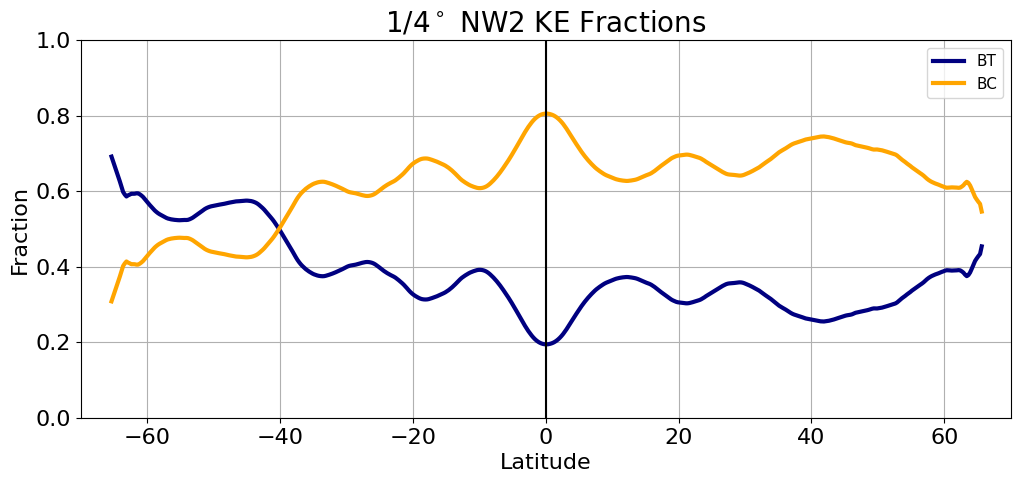

In [35]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=30

plt.figure(figsize=(12, 5), dpi= 100, facecolor='w', edgecolor='k')
#plt.plot(yh,np.nanmean(fraction_BT,axis=1),'-',c='#82cafc',linewidth=3)
plt.plot(yh_025,np.convolve((fraction_BT_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c=[0,0,0.5],linewidth=3)
print('done')
#plt.plot(yh_003125,np.convolve((fraction_BT_eddy_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c=[0,0,0.5],linewidth=3)
plt.grid()
plt.plot(yh_025,np.convolve((fraction_BC_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='#FFA500',linewidth=3)
#plt.plot(yh_003125,np.convolve((fraction_BC_eddy_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),':',c='#FFA500',linewidth=3)

plt.legend(['BT','BC'],loc='upper right',fontsize=11,handlelength=2)
#plt.legend(['BT','BT eddy','BC','BC eddy'],loc='upper right',fontsize=11,handlelength=2)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-70, 70); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Fraction',fontsize=16)
plt.title('1/4$^\circ$ NW2 KE Fractions',fontsize=20)

Text(0.5, 1.0, 'NW2 BT KE Fraction Comparison')

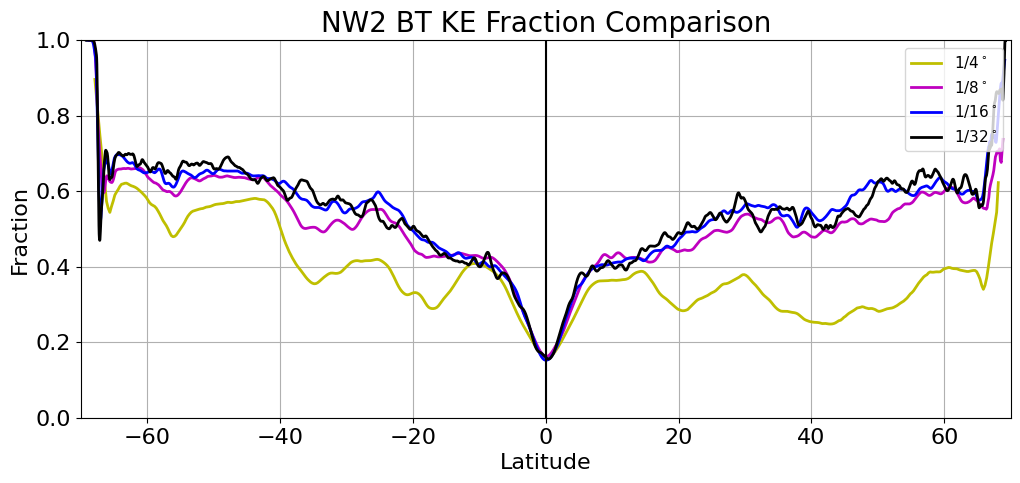

In [29]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=10

plt.figure(figsize=(12, 5), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh_025,np.convolve((fraction_BT_025.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='y',linewidth=2)
plt.plot(yh_0125,np.convolve((fraction_BT_0125.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='m',linewidth=2)
plt.plot(yh_00625,np.convolve((fraction_BT_00625.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='b',linewidth=2)
plt.plot(yh_003125,np.convolve((fraction_BT_003125.mean('xh').compute()), np.ones((window,))/window, mode='same'),'-',c='k',linewidth=2)

plt.grid()

plt.legend(['1/4$^\circ$','1/8$^\circ$','1/16$^\circ$','1/32$^\circ$'],loc='upper right',fontsize=11,handlelength=2)
plt.plot([0, 0],[0, 1],'-',color=[0,0,0])
plt.xlim(-70, 70); plt.xticks(fontsize=16);
plt.ylim(0,1); plt.yticks(fontsize=16);
plt.xlabel('Latitude',fontsize=16)
plt.ylabel('Fraction',fontsize=16)
plt.title('NW2 BT KE Fraction Comparison',fontsize=20)